In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
SONGS_FILE_PATH = "assets/data/songs.csv"
CATEGORIES_FILE_PATH =  "assets/data/categories.csv"

In [12]:
df = pd.read_csv(SONGS_FILE_PATH)
df_cate = pd.read_csv(CATEGORIES_FILE_PATH)

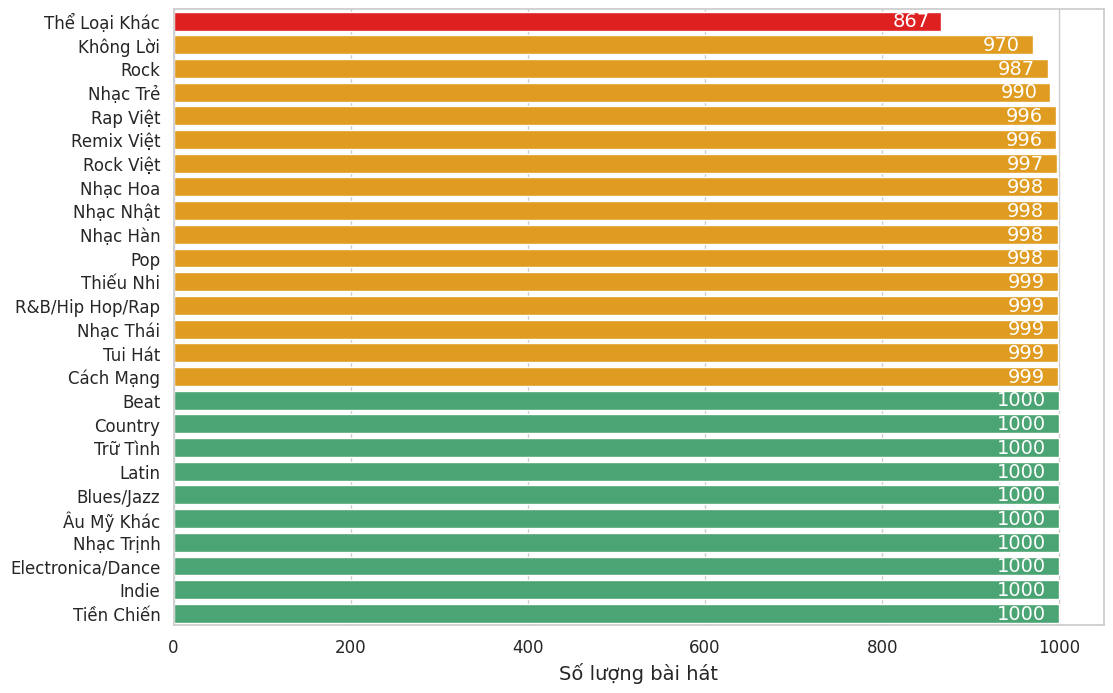

In [13]:
category_counts = df['category_name'].value_counts().sort_values()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

highlight_color = 'mediumseagreen'
low_count_color = 'red'
standard_color = 'orange'

colors = [
    highlight_color if count >= 1000 else
    low_count_color if count < 900 else
    standard_color for count in category_counts.values
]

# Create a horizontal bar plot with Seaborn
sns.barplot(x=category_counts.values, y=category_counts.index, palette=colors, hue=category_counts.index)

# Add data labels inside the bars
for index, value in enumerate(category_counts.values):
    plt.text(
        value - (value * 0.015),
        index,
        f'{value}',
        va='center',
        ha='right',
        color='white',
        fontsize=14
    )

# Customize the plot
#plt.title('Songs crawled by Categories', fontsize=18, pad=20)
plt.xlabel('Số lượng bài hát', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.savefig('assets/EDA_charts/songs_by_categories.jpg', format='jpg', bbox_inches='tight')
# Display the plot
plt.show()


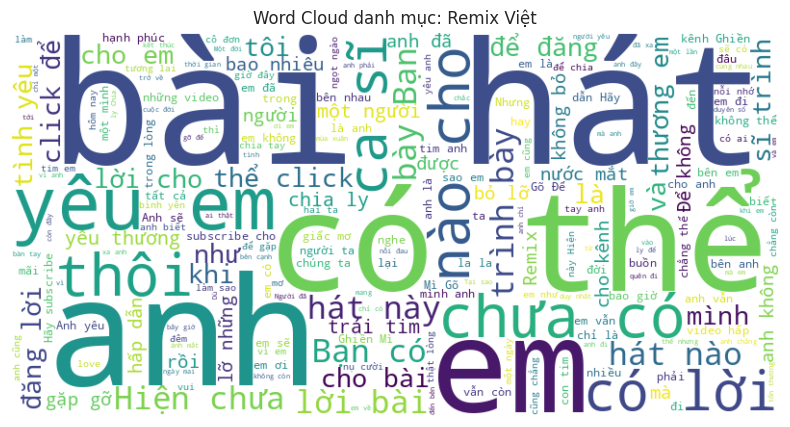

In [23]:
popular_category = df_cate['name'][2]
lyrics = ' '.join(df[df['category_name'] == popular_category]['lyrics'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud danh mục: {popular_category}')
plt.savefig(f'assets/EDA_charts/{popular_category}_word_cloud.jpg', format='jpg', bbox_inches='tight')
plt.show()


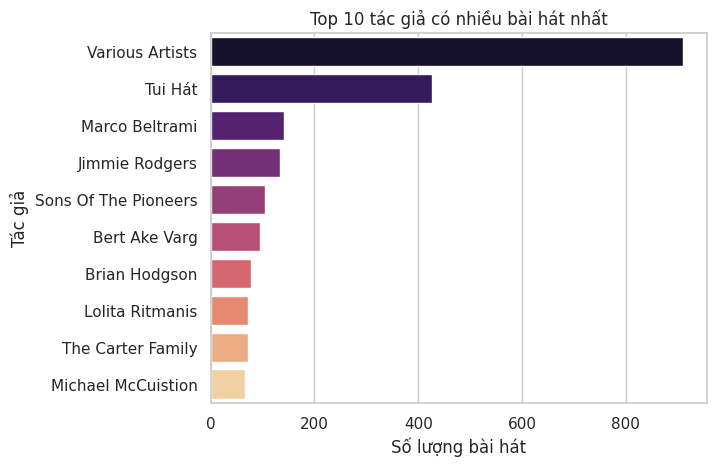

In [16]:
top_authors = df['authors'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma', hue=top_authors.index)
plt.title('Top 10 tác giả có nhiều bài hát nhất')
plt.xlabel('Số lượng bài hát')
plt.ylabel('Tác giả')
plt.savefig(f'assets/EDA_charts/top_10_authors.jpg', format='jpg', bbox_inches='tight')
plt.show()
